<a href="https://colab.research.google.com/github/EzyHow/ML-Deep-Learning-GenAI/blob/main/CIFAR_100_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.metrics import confusion_matrix

# 1. Dataset Setup

### 1.1 Load Dataset

In [ ]:
# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

# Print shapes to confirm successful loading
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]], dtype=uint8)
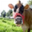

In [ ]:
x_train[0]

In [ ]:
y_train[0]

array([19])

### 1.2 One-Hot Encode Labels

In [ ]:
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=100)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes=100)

### 1.3 Normalize Dataset

In [ ]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

print("Normalized training data shape:", x_train_normalized.shape)
print("Normalized test data shape:", x_test_normalized.shape)

Normalized training data shape: (50000, 32, 32, 3)
Normalized test data shape: (10000, 32, 32, 3)


In [ ]:
x_train_normalized[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.76470588, 0.80392157, 0.75686275],
        [0.83137255, 0.87843137, 0.8       ],
        [0.71372549, 0.76078431, 0.65490196]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.66666667, 0.69019608, 0.58823529],
        [0.63137255, 0.65882353, 0.50980392],
        [0.57254902, 0.60392157, 0.44313725]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.74117647, 0.78039216, 0.6627451 ],
        [0.65098039, 0.69803922, 0.50980392],
        [0.4745098 , 0.52156863, 0.34117647]],

       ...,

       [[0.58039216, 0.7254902 , 0.30980392],
        [0.55686275, 0.71372549, 0.22352941],
        [0.54901961, 0

### 1.4 Verify Dataset Shapes

In [ ]:
print('x_train => ', x_train.shape)
print ('x_test => ', x_test.shape)
print ('\n\n')
print('x_train_normalized => ', x_train_normalized.shape)
print ('x_test_normalized => ', x_test_normalized.shape)
print ('\n\n')
print ('y_train => ', y_train.shape)
print ('y_train_one_hot =>', y_train_one_hot.shape)
print ('\n\n')
print ('y_test => ', y_test.shape)
print ('y_test_one_hot =>', y_test_one_hot.shape)

x_train =>  (50000, 32, 32, 3)
x_test =>  (10000, 32, 32, 3)



x_train_normalized =>  (50000, 32, 32, 3)
x_test_normalized =>  (10000, 32, 32, 3)



y_train =>  (50000, 1)
y_train_one_hot => (50000, 100)



y_test =>  (10000, 1)
y_test_one_hot => (10000, 100)


# 2. Model Building

### 2.1 Basic ANN Model

In [ ]:
# basic_ann_model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(32, 32, 3)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(100, activation='softmax')
# ])

basic_ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

basic_ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

basic_ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 835,876 (3.19 MB)

 Trainable params: 835,108 (3.19 MB)

 Non-trainable params: 768 (3.00 KB)

### 2.2 Basic CNN Model

In [ ]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

basic_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,884 (901.89 KB)

 Trainable params: 230,884 (901.89 KB)

 Non-trainable params: 0 (0.00 B)

### 2.3 Deeper CNN Model

In [ ]:
# deeper_cnn_model = keras.Sequential([
#     keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Dropout(0.25),

#     keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Dropout(0.25),

#     keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Dropout(0.25),

#     keras.layers.Flatten(),
#     keras.layers.Dense(256, activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dropout(0.5),

#     keras.layers.Dense(100, activation='softmax')
# ])

deeper_cnn_model = keras.Sequential([

    # Data preprocessing & augmentation
    keras.layers.Rescaling(1./255, input_shape=(32, 32, 3)),
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),

    # Block 1
    keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.3),

    # Block 2
    keras.layers.Conv2D(128, (3,3), padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3,3), padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.4),

    # Block 3
    keras.layers.Conv2D(256, (3,3), padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(256, (3,3), padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.4),

    # Classifier
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="softmax")   # 100 classes for CIFAR-100
])

deeper_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

deeper_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_2 (RandomFlip)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_2 (RandomZoom)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,333,924 (5.09 MB)

 Trainable params: 1,331,108 (5.08 MB)

 Non-trainable params: 2,816 (11.00 KB)

# 3. Model Training

In [ ]:
# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### 3.1 Training Basic ANN Model

In [ ]:
basic_ann_model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'best_basic_ann_model.weights.h5',
    monitor = 'val_loss',
    save_weights_only = True,
    save_best_only=True,
    mode='min',
    verbose=1
    )

print('Training ANN model...')
basic_ann_model_history = basic_ann_model.fit(
    x_train_normalized,
    y_train_one_hot,
    epochs=50,
    batch_size=128,
    validation_data=(x_test_normalized, y_test_one_hot),
    callbacks=[early_stopping, basic_ann_model_checkpoint]
)
print('Training ANN model completed...')

Training ANN model...
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0497 - loss: 4.3902
Epoch 1: val_loss improved from inf to 3.91885, saving model to best_basic_ann_model.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.0498 - loss: 4.3896 - val_accuracy: 0.1047 - val_loss: 3.9189
Epoch 2/50
389/391 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1147 - loss: 3.8204
Epoch 2: val_loss improved from 3.91885 to 3.69385, saving model to best_basic_ann_model.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1147 - loss: 3.8201 - val_accuracy: 0.1396 - val_loss: 3.6938
Epoch 3/50
379/391 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1386 - loss: 3.6769
Epoch 3: val_loss improved from 3.69385 to 3.55006, saving model to best_basic_ann_model.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1387 - loss: 3.6764 - val_accuracy: 0.1591 - val_loss: 3.5501
Epoch 4/50
383/391 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1482

### 3.2 Training Basic CNN Model

In [ ]:
basic_cnn_model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'best_basic_cnn_model.weights.h5',
    monitor = 'val_loss',
    save_weights_only = True,
    save_best_only=True,
    mode='min',
    verbose=1
    )

print('Training Basic CNN model...')
basic_cnn_model_history = basic_cnn_model.fit(
    x_train_normalized,
    y_train_one_hot,
    epochs=50,
    batch_size=64,
    validation_data=(x_test_normalized, y_test_one_hot),
    callbacks=[early_stopping, basic_cnn_model_checkpoint]
)
print('Training completed for Basic CNN model!')

Training Basic CNN model...
Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0429 - loss: 4.3343
Epoch 1: val_loss improved from inf to 3.65426, saving model to best_basic_cnn_model.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.0430 - loss: 4.3340 - val_accuracy: 0.1498 - val_loss: 3.6543
Epoch 2/50
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1820 - loss: 3.4170
Epoch 2: val_loss improved from 3.65426 to 3.10289, saving model to best_basic_cnn_model.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1822 - loss: 3.4155 - val_accuracy: 0.2432 - val_loss: 3.1029
Epoch 3/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2510 - loss: 3.0270
Epoch 3: val_loss improved from 3.10289 to 3.07230, saving model to best_basic_cnn_model.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2511 - loss: 3.0267 - val_accuracy: 0.2507 - val_loss: 3.0723
Epoch 4/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0

### 3.3 Training Deeper CNN Model

In [ ]:
deeper_cnn_model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'best_deep_cnn_model.weights.h5',
    monitor = 'val_loss',
    save_weights_only = True,
    save_best_only=True,
    mode='min',
    verbose=1
    )

# Adapt the Normalization layer to the training data
# deeper_cnn_model.layers[0].adapt(x_train) # Removed this line

print('Training Deeper CNN model...')
deeper_cnn_model_history = deeper_cnn_model.fit(
    x_train_normalized, # Use normalized data for training
    y_train_one_hot,
    epochs=50,
    batch_size=128,
    validation_data=(x_test_normalized, y_test_one_hot), # Use normalized data for validation
    callbacks=[early_stopping, deeper_cnn_model_checkpoint]
)
print('Training completed for Deeper CNN model!')

Training Deeper CNN model...
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0519 - loss: 4.7302
Epoch 1: val_loss improved from inf to 7.52515, saving model to best_deep_cnn_model.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 63ms/step - accuracy: 0.0520 - loss: 4.7292 - val_accuracy: 0.0100 - val_loss: 7.5252
Epoch 2/50
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1349 - loss: 3.7819
Epoch 2: val_loss improved from 7.52515 to 4.59726, saving model to best_deep_cnn_model.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - accuracy: 0.1350 - loss: 3.7814 - val_accuracy: 0.0809 - val_loss: 4.5973
Epoch 3/50
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2009 - loss: 3.3333
Epoch 3: val_loss improved from 4.59726 to 4.22715, saving model to best_deep_cnn_model.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.2009 - loss: 3.3330 - val_accuracy: 0.1127 - val_loss: 4.2272
Epoch 4/50
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accur

# 4. Model Evaluation

### 4.1 Model Evaluation

Evaluating Basic ANN Model...
Basic ANN Model - Loss: 814.5613, Accuracy: 0.0578

Evaluating Basic CNN Model...
Basic CNN Model - Loss: 657.3835, Accuracy: 0.1449

Evaluating Deeper CNN Model...
Deeper CNN Model - Loss: 1476.3621, Accuracy: 0.0173


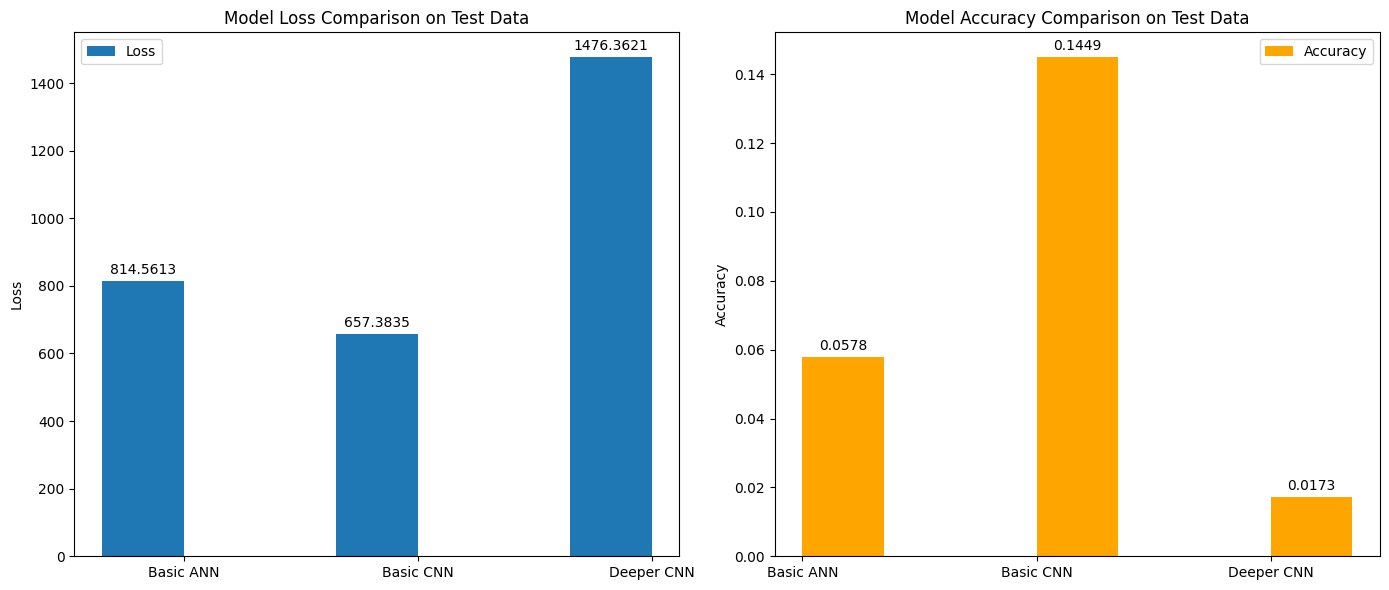

In [ ]:
# Evaluate Basic ANN model
print("Evaluating Basic ANN Model...")
loss_ann, accuracy_ann = basic_ann_model.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"Basic ANN Model - Loss: {loss_ann:.4f}, Accuracy: {accuracy_ann:.4f}")

# Evaluate Basic CNN model
print("\nEvaluating Basic CNN Model...")
loss_cnn, accuracy_cnn = basic_cnn_model.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"Basic CNN Model - Loss: {loss_cnn:.4f}, Accuracy: {accuracy_cnn:.4f}")

# Evaluate Deeper CNN model
print("\nEvaluating Deeper CNN Model...")
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"Deeper CNN Model - Loss: {loss_deeper_cnn:.4f}, Accuracy: {accuracy_deeper_cnn:.4f}")

# Data for plotting
model_names = ['Basic ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_cnn, accuracy_deeper_cnn]

# Plotting the comparison
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Loss
rects1 = ax[0].bar(x - width/2, losses, width, label='Loss')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model Loss Comparison on Test Data')
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_names)
ax[0].legend()

# Plotting Accuracy
rects2 = ax[1].bar(x + width/2, accuracies, width, label='Accuracy', color='orange')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Model Accuracy Comparison on Test Data')
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_names)
ax[1].legend()

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax[0])
autolabel(rects2, ax[1])

plt.tight_layout()
plt.show()

### 4.2 Confusion Matrix

In [ ]:
y_true_labels = np.argmax(y_test_one_hot, axis=1)
print("Shape of y_true_labels:", y_true_labels.shape)

Shape of y_true_labels: (10000,)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Shape of ANN predictions: (10000, 100)
Shape of Basic CNN predictions: (10000, 100)
Shape of Deeper CNN predictions: (10000, 100)


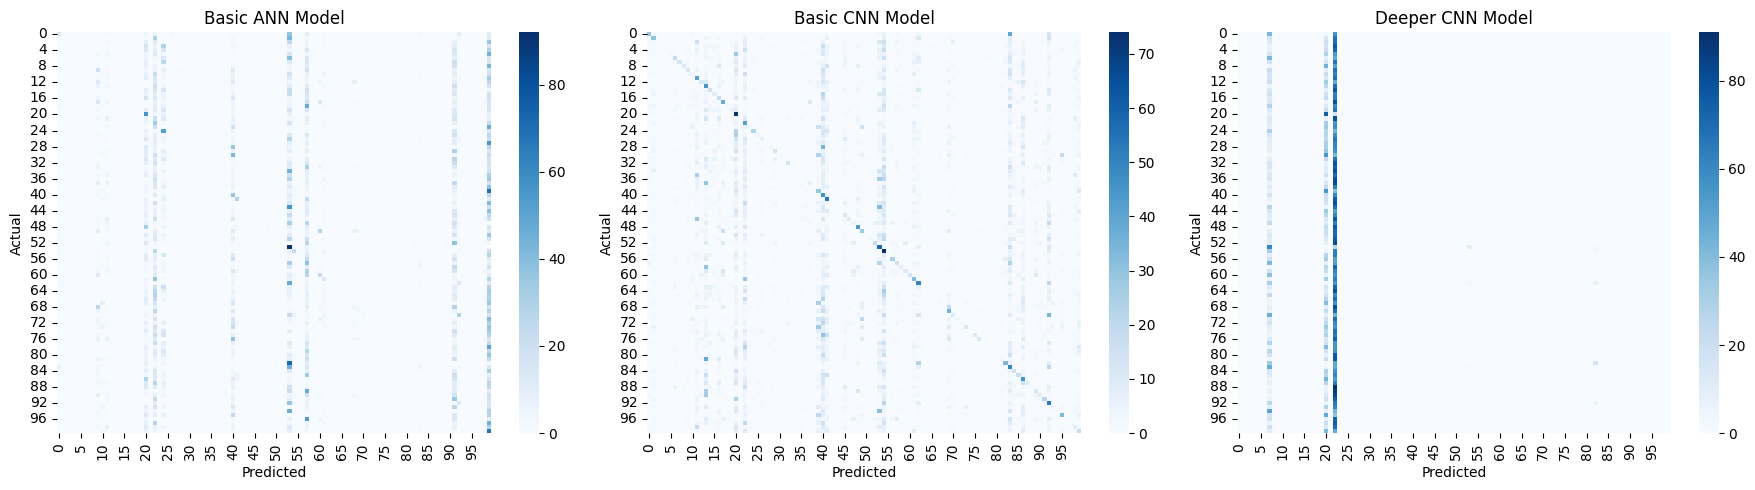

In [ ]:
# Get predictions from each model
y_pred_ann = basic_ann_model.predict(x_test)
y_pred_cnn = basic_cnn_model.predict(x_test)
y_pred_deeper_cnn = deeper_cnn_model.predict(x_test)

print("Shape of ANN predictions:", y_pred_ann.shape)
print("Shape of Basic CNN predictions:", y_pred_cnn.shape)
print("Shape of Deeper CNN predictions:", y_pred_deeper_cnn.shape)


# Convert predictions to labels
y_pred_ann_labels = np.argmax(y_pred_ann, axis=1)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)
y_pred_deeper_cnn_labels = np.argmax(y_pred_deeper_cnn, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(y_true_labels, y_pred_ann_labels)
cm_basic_cnn = confusion_matrix(y_true_labels, y_pred_cnn_labels)
cm_deeper_cnn = confusion_matrix(y_true_labels, y_pred_deeper_cnn_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_ann, annot=False, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Basic ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic_cnn, annot=False, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper_cnn, annot=False, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Deeper CNN Model")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()